# A Discrete Switching System

A la MHS, but all discrete.


In [1]:
from gtsam import DiscreteBayesNet, DiscreteKeys, DiscreteFactorGraph, Ordering
from gtsam.symbol_shorthand import S
from gtsam.symbol_shorthand import M


In [2]:
def P(*args):
    """ Create a DiscreteKeys instances from a variable number of DiscreteKey pairs."""
    # TODO: We can make life easier by providing variable argument functions in C++ itself.
    dks = DiscreteKeys()
    for key in args:
        dks.push_back(key)
    return dks


In [3]:
import graphviz


class show(graphviz.Source):
    """ Display an object with a dot method as a graph."""

    def __init__(self, obj):
        """Construct from object with 'dot' method."""
        # This small class takes an object, calls its dot function, and uses the
        # resulting string to initialize a graphviz.Source instance. This in turn
        # has a _repr_mimebundle_ method, which then renders it in the notebook.
        super().__init__(obj.dot())


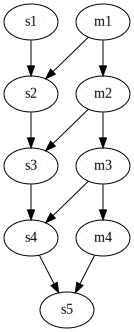

In [31]:
nrStates = 3
K = 5

bayesNet = DiscreteBayesNet()

# Add "motion models".
for k in range(1, K):
    key = S(k), nrStates
    key_plus = S(k+1), nrStates
    mode = M(k), 2
    bayesNet.add(key_plus, P(key, mode), "1/1/1 1/2/1 3/2/3 1/1/1 1/2/1 3/2/3")

# Add "mode chain"
for k in range(1, K-1):
    mode = M(k), 2
    mode_plus = M(k+1), 2
    bayesNet.add(mode_plus, P(mode), "1/2 3/2")

show(bayesNet)


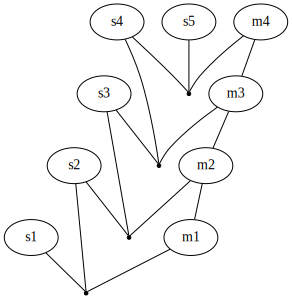

In [32]:
# Create a factor graph out of the Bayes net.
factorGraph = DiscreteFactorGraph(bayesNet)
show(factorGraph)


In [33]:
# Create an ordering that eliminates modes last:
ordering = Ordering()
# First eliminate "continuous" states in time order
for k in range(1, K+1):
    ordering.push_back(S(k))
for k in range(1, K):
    ordering.push_back(M(k))
print(ordering)

Position 0: s1, s2, s3, s4, s5, m1, m2, m3, m4



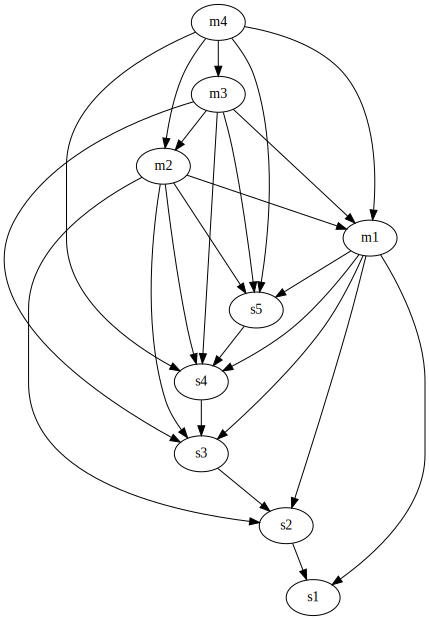

In [34]:
# Create a BayesNet out of the factor graph.
DAG = factorGraph.eliminateSequential(ordering)
show(DAG)

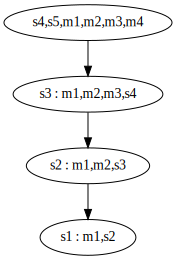

In [35]:
# Create a BayesTree out of the factor graph.
bayesTree = factorGraph.eliminateMultifrontal(ordering)
show(bayesTree)